In [ ]:
names = (
        'angle',    # угол наблюдения
        'distr_no',     # порядковый номер планковского распределения
        'distr_name',    # название распределения
        'alpha', 'Dm', 'dm', 'eta', 'beta', 'cl_bottom',    # параметры распределения
        'xi', 'K',    # ещё параметры (K зависит от %)
        'required_percentage',    # % покрытия облаками (cloud amount)
        'kernel',    # ядро усреднения / размер эл-та разрешения радиометра в узлах

        'Q_true', 'W_true',    # статистика на истинные средние значения TWV и LWC
        'efl_H',    # статистика на высоту эквивалентного по водозапасу сплошного слоя облачности

        'freq_pair_no', 'nu1', 'nu2',    # порядковый номер пары частот, сами частоты

        # статистика в элементе разрешения
        'tb_nu1', 'tb_nu2',    # яркостные температуры
        'tau_nu1', 'tau_nu2',    # коэффициент полного поглощения
        'efl_tb_nu1', 'efl_tb_nu2',    # яркостная температура для эквивалентного по водозапасу сплошного слоя
        'efl_tau_nu1', 'efl_tau_nu2',    # полное поглощения для эквивалентного по водозапасу сплошного слоя

        # статистика в элементе разрешения - восстановление TWV и LWC
        'Qr', 'Wr',    # сначала решение обратной задачи, затем усреднение полученных 2D-карт TWV и LWC
        'Qrs', 'Wrs',    # сначала усреднение 2D-карт яркостной температуры, затем решение обратной задачи
        'efl_Qrss', 'efl_Wrss',    # TWV и LWC, восстановленные по яркостной температуре эквивалентного сплошного слоя
)

In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [33]:
import numpy as np
import dill

class Data:
    def __init__(self, column_names, data):
        
        self.names = column_names
        self.data = data
        
        n = {}
        for key, value in enumerate(self.names):
            n[value] = key
        self.n = n
        
    def get(self, *args) -> np.ndarray:
        out = []
        for arg in args:
            out.append(self.data[:, self.n[arg]])
        out = np.asarray(out)
        if len(args) == 1:
            return out[0]
        return out
        
    def dist(self, prefix: str) -> 'Data':
        cond = np.asarray([str(distr_name).find(prefix) + 1
                           for distr_name in self.get('distr_name')], dtype=bool)
        return Data(column_names=self.names, data=self.data[cond])
        
    def select(self, **kwargs) -> 'Data':
        cond = np.asarray([True for _ in range(len(self.data))])
        for key, value in kwargs.items():
            d = self.get(str(key)).astype(type(value))
            cond = np.isclose(d, value) & cond
        return Data(column_names=self.names, data=self.data[cond])
    

def means(arr) -> float:
    return np.asarray([val.mean for val in arr])

def mins(arr) -> float:
    return np.asarray([val.min for val in arr])

def maxs(arr) -> float:
    return np.asarray([val.max for val in arr])

In [34]:
with open('post_data_theta0_kernel60.bin', 'rb') as dump:
    data = dill.load(dump)

In [35]:
data = Data(column_names=data[0], data=data[1:])

In [36]:
len(data.data)

2481

In [37]:
len(data.dist('L2').data)

1854

In [38]:
len(data.dist('L3').data)

627

In [39]:
percentages = np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))
percentages

array([0.2, 0.22631578947368422, 0.25263157894736843, 0.2789473684210526,
       0.30526315789473685, 0.3315789473684211, 0.35789473684210527,
       0.38421052631578945, 0.4105263157894737, 0.4368421052631579,
       0.4631578947368421, 0.48947368421052634, 0.5157894736842106,
       0.5421052631578946, 0.5684210526315789, 0.5947368421052632,
       0.6210526315789473, 0.6473684210526316, 0.6736842105263158, 0.7],
      dtype=object)

<IPython.core.display.Javascript object>


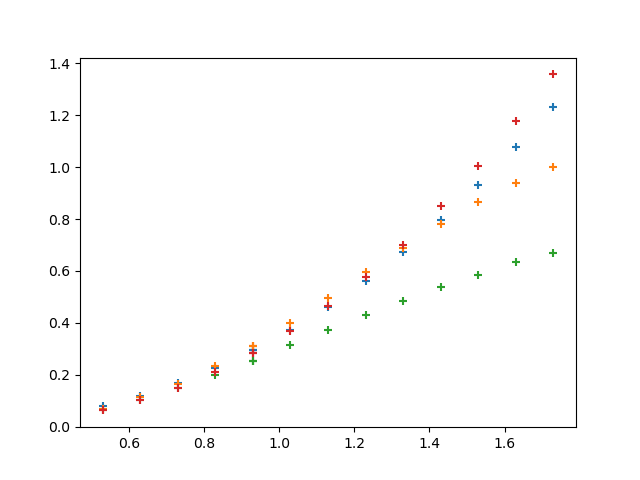

In [44]:
eta, W_true, Wr, Wrs, efl_Wrss = \
    data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
       'eta', 'W_true', 'Wr', 'Wrs', 'efl_Wrss'
    )

plt.figure()
plt.scatter(eta, means(W_true), marker='+')
plt.scatter(eta, [w.mean for w in Wr], marker='+')
plt.scatter(eta, [w.mean for w in Wrs], marker='+')
plt.scatter(eta, [w.mean for w in efl_Wrss], marker='+')